In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, \
    GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, \
    mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, \
    recall_score, f1_score, log_loss, auc, classification_report, confusion_matrix, \
    precision_recall_curve, roc_curve

# Регрессия

Этот набор данных представляет собой запись о 7 распространенных различных видах рыб, продаваемых на рыбном рынке. С помощью этого набора данных можно обучить модель, которая будет предсказывать **вес рыбы**.

- Weight - weight of fish in Gram g
- Length1 - vertical length in cm
- Length2 - diagonal length in cm
- Length3 - cross length in cm
- Height - height in cm
- Width - diagonal width in cm

## EDA

1) Импортируйте файл Fish.csv, записав в переменную **df**

In [2]:
df = pd.read_csv('Fish.csv')

2) Вывести первые пять строк

In [3]:
df[:5]

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


3) Выведите размер датасета

In [4]:
df.shape

(159, 7)

4) Вывести общую информацию о датафрейме при помощи метода info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


5) Вывести основные описательные статистики для числовых и категориальных признаков

In [6]:
df.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


6) Постройте тепловую карту для оценки **корреляции признаков**, что можно сказать на основании графика?

/tmp/ipykernel_74388/661728506.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f')


<AxesSubplot: >

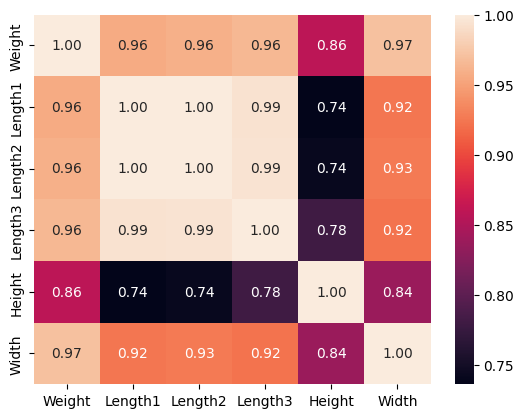

In [7]:
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f')

7) Удалите скоррелированные числовые признаки, где корреляция больше 0.9, при помощи кода ниже, где:
- df - исходный датасет
- to_drop - колонки, которые необходимо удалить

**Результат запишите в переменную df_clean**, переменную df в данном случае оставьте без изменений

In [8]:
cor_matrix = df.corr(method='spearman').abs()

upper_tri = cor_matrix.where(
    np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))

to_drop = [
    column for column in upper_tri.columns if any(upper_tri[column] > 0.9)
]

/tmp/ipykernel_74388/874198481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr(method='spearman').abs()
/tmp/ipykernel_74388/874198481.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


In [9]:
df_clean = df.drop(columns=to_drop)
df_clean

,Species,Weight,Height
0,Bream,242.0,11.5200
1,Bream,290.0,12.4800
2,Bream,340.0,12.3778
3,Bream,363.0,12.7300
4,Bream,430.0,12.4440
...,...,...,...
154,Smelt,12.2,2.0904
155,Smelt,13.4,2.4300
156,Smelt,12.2,2.2770
157,Smelt,19.7,2.8728


8) Проанализируйте **целевую переменную Weight в df_clean**, что вы можете сказать о распределении? Нормально ли оно? проверьте при помощи стат метода

7.605608920435714e-10

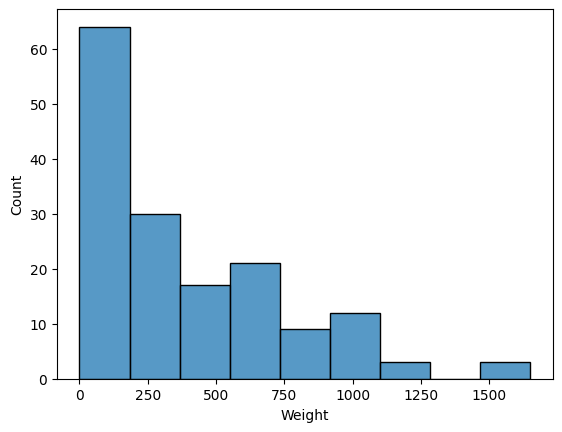

In [10]:
sns.histplot(df_clean.Weight)
stats.shapiro(df_clean.Weight).pvalue

Распределение не является нормальным, pvalue < 0.05

9) Если распределение не нормальное, то **прологарифмируйте**  таргет Weight с **добавлением внутри единицы**, **записав значения в новую колонку Weight_log** в переменнной df_clean

Проверьте, стало ли распределение нормальным

In [11]:
df_clean["Weight_log"] = np.log(df_clean.Weight + 1)
stats.shapiro(df_clean.Weight_log).pvalue

1.1928077192635556e-08

<AxesSubplot: xlabel='Weight_log', ylabel='Count'>

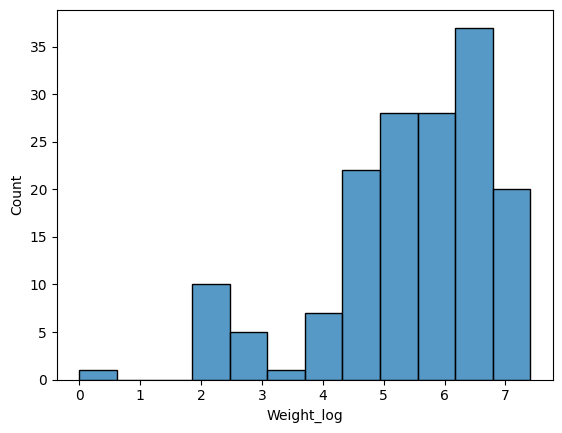

In [12]:
sns.histplot(df_clean.Weight_log)

Pvalue < 0.05 => распределение не является нормальное, однако оно стало более нормальным, чем было

10) Создайте новую переменную **df_label**, присвойте ей трансформированный датасет df_clean при помощи One-hot кодирования (лучше использовать pandas.get_dummies() для бинаризации)

Примените drop_first = True

In [13]:
df_label = pd.get_dummies(df_clean, drop_first=True)
df_label

,Weight,Height,Weight_log,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,11.5200,5.493061,0,0,0,0,0,0
1,290.0,12.4800,5.673323,0,0,0,0,0,0
2,340.0,12.3778,5.831882,0,0,0,0,0,0
3,363.0,12.7300,5.897154,0,0,0,0,0,0
4,430.0,12.4440,6.066108,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
154,12.2,2.0904,2.580217,0,0,0,0,1,0
155,13.4,2.4300,2.667228,0,0,0,0,1,0
156,12.2,2.2770,2.580217,0,0,0,0,1,0
157,19.7,2.8728,3.030134,0,0,0,0,1,0


## Modeling

11) Разбиение данных на train/test

- Разбейте данные на тренировочные и тестовые test_size=0.25
- Установите константу RAND = 10 в самом начале и используйте далее как random_state
- Не забывайте про стандартизацию
- Не забывайте, что нужно для записи в переменную X удалить целевые переменные 'Weight', 'Weight_log'
- Если вы логарифмировали y_test, то незабудьте создать к примеру новую переменную y_test_exp (произвести потенционирование), чтобы правильно анализировать значения метрик

In [14]:
RAND = 10

x = df_label.drop(columns=["Weight", "Weight_log"])
y = df_label["Weight_log"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=RAND)

st = StandardScaler()
x_train_std = st.fit_transform(x_train)
x_test_std = st.transform(x_test)

12) Необходимо реализовать алгоритм Linear Regression при помощи метода оптимизации **стохастический градиентный спуск**

Необходимо взять пример из лекции, где реализована линейная регрессия без использования sklearn, и немного поменять алгоритм. Не забываем, что нам нет необходимости суммировать результат по всей выборке! А также будьте аккуратны при вычитании антиградиента (не будет нормирования на всю длину X)!

In [15]:
class MyLinearRegression:
    def __init__(self,
                 learning_rate: float = 0.01, 
                 eps: float = 0.001, 
                 iters: int = 100):
        """
        Инициализация параметров

        :param learning_rate: скорость обучения (eta)
        :param eps: дельта разницы
        :param iters: кол-во итераций
        """
        self.learnig_rate = learning_rate
        self.eps = eps
        self.iters = iters

    def mse(self, true_y: np.ndarray, pred_y: np.ndarray):
        """
        MSE функция потерь
        :param y_true: фактическое значение y (целевая переменная)
        :param y_pred: предсказанное значение алгоритма
        :return: значение ошибки
        """
        errors = true_y - pred_y
        return (errors ** 2).sum() / len(errors)

    def net_input(self, X: np.ndarray):
        """
        Получение вектора ответов путем перемножения
        вектора признаков на вектор весов
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X: np.ndarray):
        """
         Получение вектора ответов
        :param X: вектор признаков
        """
        return self.net_input(X)

    def fit(self, X: np.ndarray, Y: np.ndarray):
        """
         Обучение модели
        :param X: матрица признаков
        :param y: вектор таргетов
        """
        self.w_ = np.zeros(1 + X.shape[1])
        
        self.cost_ = []

        for i in range(self.iters):
            w_pred = self.w_.copy()

            output = self.net_input(X)

            errors = Y - output
            
            rand_row = np.random.choice(X.shape[0]) 
            rand_x = X[rand_row]
            rand_y = Y[rand_row]

            self.w_[1:] -= self.learnig_rate * (-2) * rand_x.T.dot(errors[rand_row])
            self.w_[0] -= self.learnig_rate * (-2) * errors[rand_row]
            
            cost = self.mse(Y, self.net_input(X))
            self.cost_.append(cost)

            if abs(np.mean(w_pred - self.w_)) < self.eps:
                break

In [16]:
def r2_adjusted(y_true: np.ndarray, y_pred: np.ndarray,
                X_test: np.ndarray) -> float:
    """Коэффициент детерминации (множественная регрессия)"""
    N_objects = len(y_true)
    N_features = X_test.shape[1]
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (N_objects - 1) / (N_objects - N_features - 1)


def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Mean percentage error"""
    return np.mean((y_true - y_pred) / y_true) * 100


def mape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Mean absolute percentage error"""
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


def wape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Weighted Absolute Percent Error"""
    return np.sum(np.abs(y_pred - y_true)) / np.sum(y_true) * 100


def huber_loss(y_true: np.ndarray, y_pred: np.ndarray, delta: float = 1.345):
    """Функция ошибки Хьюбера"""
    assert len(y_true) == len(y_pred), 'Разные размеры данных'
    huber_sum = 0
    for i in range(len(y_true)):
        if abs(y_true[i] - y_pred[i]) <= delta:
            huber_sum += 0.5 * (y_true[i] - y_pred[i])**2
        else:
            huber_sum += delta * (abs(y_true[i] - y_pred[i]) - 0.5 * delta)
    huber_sum /= len(y_true)
    return huber_sum


def logcosh(y_true: np.ndarray, y_pred: np.ndarray):
    """функция ошибки Лог-Кош"""
    return np.sum(np.log(np.cosh(y_true - y_pred)))


def rmsle(y_true: np.ndarray, y_pred: np.ndarray) -> np.float64:
    """
    The Root Mean Squared Log Error (RMSLE) metric 
    Логаритмическая ошибка средней квадратичной ошибки
    """
    try:
        return np.sqrt(mean_squared_log_error(y_true, y_pred))
    except:
        return None


def get_metrics(y_test: np.ndarray,
                y_pred: np.ndarray,
                X_test: np.ndarray,
                name: str = None,
                delta: float = 1.345):
    """Генерация таблицы с метриками"""
    df_metrics = pd.DataFrame()

    df_metrics['model'] = [name]

    df_metrics['MAE'] = mean_absolute_error(y_test, y_pred)
    df_metrics['MSE'] = mean_squared_error(y_test, y_pred)
    df_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
    df_metrics['RMSLE'] = rmsle(y_test, y_pred)
    df_metrics['R2 adjusted'] = r2_adjusted(y_test, y_pred, X_test)
    # df_metrics['Huber_loss'] = huber_loss(y_test, y_pred, delta)
    # df_metrics['Logcosh'] = logcosh(y_test, y_pred)
    df_metrics['MPE_%'] = mpe(y_test, y_pred)
    df_metrics['MAPE_%'] = mape(y_test, y_pred)
    df_metrics['WAPE_%'] = wape(y_test, y_pred)

    return df_metrics

13) Обучите разработанную модель линейной регрессии с использованием следующих значений параметров на train выборке:
    
- learning_rate=0.001
- eps=0.0000001
- iters=4000

In [17]:
model = MyLinearRegression(learning_rate=0.001, eps=0.0000001, iters=10000)
model.fit(x_train_std, y_train)

14) Какие результаты по основным метрикам вы получили на test? Что можно сказать про модель?

- Не забудьте преобразовать обратно целевую переменную (убрать логарифм) для анализа метрик (для y_test и y_predict), но в обучении участвуют прологарифмированные данные.

- На какую метрику **более релевантно смотреть на основании распределения целевой перменной**?
- На подобие как в лекции, сделайте отдельный вывод метрик в DataFrame и запишите **результат в переменную metrics**

In [18]:
y_pred = model.predict(x_test_std)
metrics = get_metrics(np.exp(y_test) - 1, np.exp(y_pred) - 1, x_test_std)

metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,None,110.792226,28723.691193,169.480651,0.603607,0.362183,38.918515,38.971418,39.091871


15) Сформируйте **таблицу DataFrame с расчитанными весами** для каждого из признаков на основании обученного ранее алгоритма:
- где первый столбец **feature** - содержатся названия признаков
- второй столбец **score** - содержатся значения весов перед соответстввующими признаками

In [19]:
cf = pd.DataFrame({"Feature": x_train.columns,"Coefficient": model.w_[1:]})
cf

,Feature,Coefficient
0,Height,0.828991
1,Species_Parkki,-0.088403
2,Species_Perch,0.040979
3,Species_Pike,0.318801
4,Species_Roach,-0.087735
5,Species_Smelt,-0.518604
6,Species_Whitefish,0.088510


16) Примените стандартный метод для линейной регресии из **sklearn**: обучите модель на train

In [20]:
model_skl = LinearRegression()

model.fit(x_train_std, y_train)

y_pred_skl = model.predict(x_test_std)

17) Какие результаты по основным метрикам вы получили на test?

- Что можно сказать про модель?
- Добавьте значения метрик по результатам работы линейной регрессии из sklearn в общий датасет с метриками **в переменную metrics**

In [21]:
metrics = pd.concat([metrics, get_metrics(
    np.exp(y_test) - 1, np.exp(y_pred_skl) + 1, x_test_std)])

metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,None,110.792226,28723.691193,169.480651,0.603607,0.362183,38.918515,38.971418,39.091871
0,None,106.228802,26723.684717,163.473804,0.576708,0.406594,36.475067,36.475067,37.481715


18) Сформируйте **таблицу DataFrame с расчитанными весами** для каждого из признаков на основании обученного ранее алгоритма:
- где первый столбец **feature** - содержатся названия признаков
- второй столбец **score** - содержатся значения весов перед соответстввующими признаками

In [22]:
cf_skl = pd.DataFrame({"Feature": x_train.columns,"Coefficient": model.w_[1:]})
cf_skl

,Feature,Coefficient
0,Height,0.838894
1,Species_Parkki,-0.109647
2,Species_Perch,0.071029
3,Species_Pike,0.280156
4,Species_Roach,-0.162071
5,Species_Smelt,-0.536798
6,Species_Whitefish,0.076450


# Борьба с переобучением

19) Примените Ridge, Lasso и ElasticNet (sklearn.linear_model) регуляризации при alpha=0.001, какие результы для каждой модели вы получили на основании предыдущих метрик?

Аналогично добавьте метрики по результатам работы алгоритмов в переменную metrics.

In [23]:
model_ridge = linear_model.Ridge(alpha=0.001)
model_ridge.fit(x_train_std, y_train)
y_pred_ridge = model_ridge.predict(x_test_std)

metrics = pd.concat([metrics, get_metrics(
    np.exp(y_test) - 1, np.exp(y_pred_ridge) - 1, x_test_std)])
metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,None,110.792226,28723.691193,169.480651,0.603607,0.362183,38.918515,38.971418,39.091871
0,None,106.228802,26723.684717,163.473804,0.576708,0.406594,36.475067,36.475067,37.481715
0,None,40.850255,3385.349080,58.183753,0.246345,0.924827,6.983753,16.631375,14.413582


In [24]:
model_lasso = linear_model.Lasso(alpha=0.001)
model_lasso.fit(x_train_std, y_train)
y_pred_lasso = model_lasso.predict(x_test_std)

metrics = pd.concat([metrics, get_metrics(
    np.exp(y_test) - 1, np.exp(y_pred_lasso) - 1, x_test_std)])
metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,None,110.792226,28723.691193,169.480651,0.603607,0.362183,38.918515,38.971418,39.091871
0,None,106.228802,26723.684717,163.473804,0.576708,0.406594,36.475067,36.475067,37.481715
0,None,40.850255,3385.349080,58.183753,0.246345,0.924827,6.983753,16.631375,14.413582
0,None,40.314915,3360.889513,57.973179,0.244371,0.925371,6.913416,16.445813,14.224693


In [25]:
model_elastic = linear_model.ElasticNet(alpha=0.001)
model_elastic.fit(x_train_std, y_train)
y_pred_elastic = model_elastic.predict(x_test_std)

metrics = pd.concat([metrics, get_metrics(
    np.exp(y_test) - 1, np.exp(y_pred_elastic) - 1, x_test_std)])
metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,None,110.792226,28723.691193,169.480651,0.603607,0.362183,38.918515,38.971418,39.091871
0,None,106.228802,26723.684717,163.473804,0.576708,0.406594,36.475067,36.475067,37.481715
0,None,40.850255,3385.349080,58.183753,0.246345,0.924827,6.983753,16.631375,14.413582
0,None,40.314915,3360.889513,57.973179,0.244371,0.925371,6.913416,16.445813,14.224693
0,None,40.460240,3367.654440,58.031495,0.244675,0.925220,6.892895,16.489717,14.275970


20) На основании распределения (даже после преобразования) используйте необходимую метрику или неск метрик, и напишите, какая из моделей была лучше

Линейная регрессия sklearn c использования lasso-регулязации оказалась лучшей

## Кросс-валидация с Holdout

21) Примените **к наилучшей выбранной модели**, которую вы уже обучали, **кросс-валидацию KFold** с 3мя фолдами на holdout (пример в лекции). Брать именно обученную модель не нужно, необходимо внутри кросс-валидации заново создавать объект экземпляра класса модели с параметрами, которые у нее были.

- Не забывайте про ранее зафиксированный **random_state**
- В качестве метрики возьмите среднюю абсолютную ошибку **mean_absolute_error**
- На каждом фолде подсчитать **значение MAE на validation** данных и **вывести**
- Не забывать про обратное преобразование целевой переменной из логарифма (**потенционирование**)
- Выведите по итогу **среднее значение MAE** полученное на всех фолдах

In [26]:
fold = KFold(n_splits = 3, random_state=RAND, shuffle=True)
metrics_ = pd.DataFrame()
y_pred_holdout = []

for fold, (train_index, test_index) in enumerate(fold.split(x_train_std, y_train)):
    x_train_, x_val_ = x_train_std[np.array(train_index)], x_train_std[np.array(test_index)]
    y_train_, y_val_ = y_train[np.array(train_index)], y_train[np.array(test_index)]
    
    lr = linear_model.Lasso(alpha=0.001)
    lr.fit(x_train_, y_train_)
    
    y_pred_ = lr.predict(x_val_)
    y_pred_holdout.append(lr.predict(x_test_std))
    
    metrics_ = pd.concat([metrics_, get_metrics(np.exp(y_val_) - 1, np.exp(y_pred_) - 1, x_val_)])
    
metrics_

/tmp/ipykernel_74388/8961807.py:12: RuntimeWarning: divide by zero encountered in divide
  return np.mean((y_true - y_pred) / y_true) * 100
/tmp/ipykernel_74388/8961807.py:17: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,None,90.997873,27416.106365,165.578097,0.291969,0.813909,-2.834400,22.974199,17.957153
0,None,135.599816,67191.166482,259.212589,0.821937,0.329842,-inf,inf,32.606691
0,None,80.992564,27077.608913,164.552754,0.410113,0.739350,-3.459132,33.734667,20.928727


In [27]:
np.mean(metrics_["MAE"])

102.53008425796226

22) Получите **предсказанные значения на Holdout** данных при помощи усреднения значений, полученных при обучении на фолдах

**Сравните** результат MAE на validation (OOF) и на test данных (Holdout)


Подсказка:
- для получения средних значений на Holdout используйте np.mean(np.column_stack(****), axis=1)

In [28]:
y_pred_mean = np.mean(np.column_stack(y_pred_holdout), axis=1)
get_metrics(np.exp(y_test) - 1, np.exp(y_pred_mean) - 1, x_test_std)

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,None,40.356457,3365.992063,58.01717,0.247557,0.925257,7.106054,16.408358,14.239351


23) Добавьте в датасет с метриками **metrics** результаты обучения модели с **KFold на Holdout данных**.

Где вы получили самые наилучшие результаты?

In [29]:
metrics = pd.concat([metrics, get_metrics(
    np.exp(y_test) - 1, np.exp(y_pred_mean) - 1, x_test_std)])
metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,None,110.792226,28723.691193,169.480651,0.603607,0.362183,38.918515,38.971418,39.091871
0,None,106.228802,26723.684717,163.473804,0.576708,0.406594,36.475067,36.475067,37.481715
0,None,40.850255,3385.349080,58.183753,0.246345,0.924827,6.983753,16.631375,14.413582
0,None,40.314915,3360.889513,57.973179,0.244371,0.925371,6.913416,16.445813,14.224693
0,None,40.460240,3367.654440,58.031495,0.244675,0.925220,6.892895,16.489717,14.275970
0,None,40.356457,3365.992063,58.017170,0.247557,0.925257,7.106054,16.408358,14.239351


Мой алгоритм и стандартный из библиотеки sklearn давали не стабильные результаты. При обучении на одних и тех же данных модель показывала разные метрики на тесте, то есть каждый раз модель подбирала разные коэффициенты. Это объясняло проблему переобучения. В итоге регуляризация решила ее. При этом кросс-валидация к лучшей модели не дала прироста в метриках.

# Классификация

Компания, которая активно занимается Big Data и Data Science, хочет нанять специалистов по анализу данных среди людей, которые успешно проходят ее курсы. Многие люди регистрируются на обучение и компания хочет понимать, кто из этих кандидатов действительно хочет работать в компании после обучения или поиска новой работы, потому что это помогает снизить стоимость и время, а также повысить качество обучения, оптимизировать расписание курсов, понимать портрет кандидата. 


- enrolle_id - Уникальный идентификатор кандидата
- city - Код города
- city_ development _index - Индекс развития города (масштабированный)
- gender - пол кандидата
- relevent_experience - релевантный опыт кандидата
- enrolled_university - тип обучения в университете (если был)
- education_level - уровень образования кандидата
- major_discipline - основная специальность по образованию
- experience - общий стаж кандидата в годах
- company_size - размер компании в работниках
- company_type - тип работодателя
- lastnewjob - дельта в годах между предыдущей и текущей работах
- training_hours - кол-во завершенных часов обучения
- target 0 – Не ищу новую работу
- target 1 – Ищу новую работу



Спрогнозировать вероятность того, что кандидат будет искать новую работу или будет работать в компании (0 - не ищу новую работу). target - целевая переменная

## EDA

24) Импортируйте файл aug_train.csv, записав в переменную **df**

In [30]:
df = pd.read_csv("aug_train.csv")

25) Вывести первые пять строк

In [31]:
df[:5]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


26) Выведите размер датасета

In [32]:
df.shape

(19158, 14)

27) Вывести общую информацию о датафрейме при помощи метода info()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

28) Вывести основные описательные статистики для числовых и категориальных признаков

In [34]:
df.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


29) Проанализировать кол-во пропусков, а также посмотреть сколько это в процентах от размера датасета (кол-ва строк)

In [35]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [36]:
df.isna().sum()/df.shape[0] * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

30) Заполните пропусками датасет

In [37]:
df.fillna('unidentified', inplace=True)

In [38]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

31) Посмотрите на целевую переменную **target** при помощи seaborn.countplot. Какое соотношение классов? Есть ли дисбаланс?

<AxesSubplot: xlabel='target', ylabel='count'>

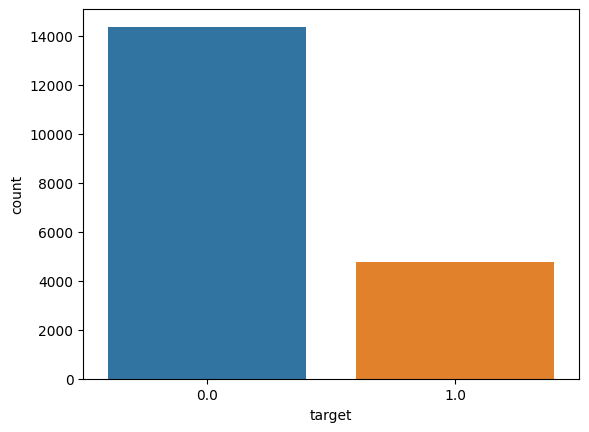

In [39]:
sns.countplot(x=df.target)
# дисбаланс есть

32) Создайте новую переменную **df_label**, присвойте ей трансформированный датасет df при помощи One-hot кодирования (лучше использовать pandas.get_dummies() для бинаризации)

- Примените drop_first = True
- Не забудьте удалить индексы ('enrollee_id')

In [40]:
df_label = pd.get_dummies(df, drop_first=True)
df_label.drop("enrollee_id", axis=1, inplace=True)

In [41]:
def get_metrics(y_test, y_pred, y_score, name=None):
    df_metrics = pd.DataFrame()

    df_metrics['model'] = [name]

    # Основные метрики для задачи классификации
    df_metrics['Accuracy'] = accuracy_score(y_test, y_pred)
    df_metrics['ROC_AUC'] = roc_auc_score(y_test, y_score[:, 1])
    df_metrics['Precision'] = precision_score(y_test, y_pred)
    df_metrics['Recall'] = recall_score(y_test, y_pred)
    df_metrics['f1'] = f1_score(y_test, y_pred)
    df_metrics['Logloss'] = log_loss(y_test, y_score)

    return df_metrics

## Modeling Baseline

33) Разбиение данных на train/test

- Разбейте данные на тренировочные и тестовые test_size=0.25
- Установите константу RAND = 10 в самом начале и используйте далее как random_state
- Не забывайте про стандартизацию
- Установите stratify=y
- Не забывайте, что нужно для записи данных в переменную X удалить целевую переменную target

In [42]:
RAND = 10

x = df_label.drop(columns=['target'])
y = df_label['target'].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, stratify=y, random_state=RAND)

st = StandardScaler()
x_train_std = st.fit_transform(x_train)
x_test_std = st.transform(x_test)

34) Примените стандартный метод для логистической регресии из **sklearn**

- Обучите модель на train и получите предсказанные значения на test
- Используйте для baseline параметр **class_weight, И ТОЛЬКО ЕГО**
- Сделайте отдельный вывод метрик в DataFrame и запишите **результат в переменную metrics**

In [43]:
model = LogisticRegression(class_weight='balanced', random_state=RAND)

model.fit(x_train_std, y_train)

y_pred = model.predict(x_train_std)
y_score = model.predict_proba(x_train_std)
metrics = get_metrics(y_train, y_pred, y_score, name="baseline train")

y_pred = model.predict(x_test_std)
y_score = model.predict_proba(x_test_std)
metrics = pd.concat([metrics, get_metrics(y_test, y_pred, y_score, name='baseline test')])

metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,baseline train,0.777213,0.81126,0.537598,0.762210,0.630498,0.534240
0,baseline test,0.761795,0.78985,0.515488,0.738693,0.607229,0.563707


In [44]:
model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

35) Постройте график кривой ROC-AUC

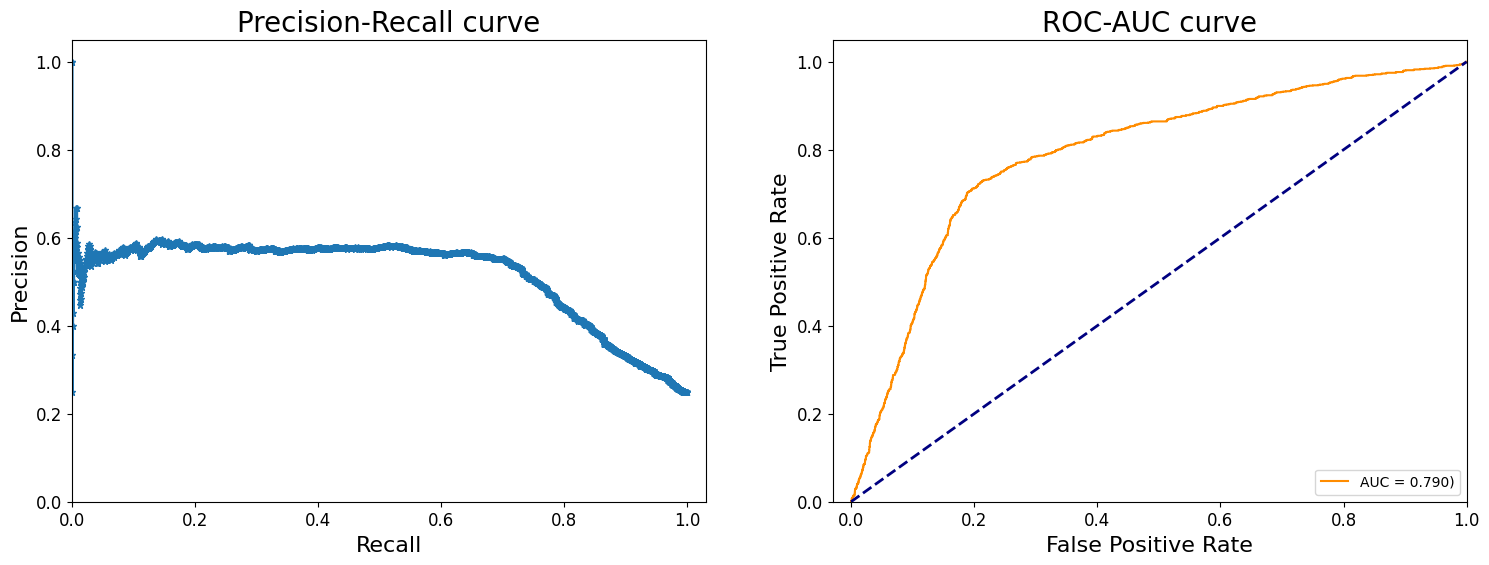

In [45]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

# # Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:, 1])

axes[0].plot(recall, precision, marker='*', linewidth=2, markersize=5)
axes[0].set_title('Precision-Recall curve', fontsize=20)
axes[0].tick_params(axis="x", labelsize=12)
axes[0].tick_params(axis="y", labelsize=12)
axes[0].set_xlim([0.0, 1.03])
axes[0].set_ylim([0.0, 1.05])

axes[0].set_xlabel('Recall', fontsize=16)
axes[0].set_ylabel('Precision', fontsize=16)


##############################################################################
# ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
# auc - Compute Area Under the Curve
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.3f})')
axes[1].set_title('ROC-AUC curve', fontsize=20)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# масштаб
axes[1].set_xlim([-0.03, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].tick_params(axis="x", labelsize=12)
axes[1].tick_params(axis="y", labelsize=12)
axes[1].set_xlabel('False Positive Rate', fontsize=16)
axes[1].set_ylabel('True Positive Rate', fontsize=16)
axes[1].legend(loc="lower right")

plt.show()

## GridSearch

36) Найдите параметры для LogisticRegression, используя StratifiedKFold с 3 фолдами, при помощи **GridSearch**

- Метрика для оптимизации scoring = 'roc_auc'

- Нужно использовать такие параметры как: penalty, C, solver, l1_ratio, tol, class_weight

- Не забудьте для StratifiedKFold зафиксировать random_state

In [46]:
model = LogisticRegression(random_state=RAND)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RAND)

grid_search_p = {
    'C': [1.0, 10, 5],
    'class_weight': ['balanced'],
    'n_jobs': [-1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'random_state': [RAND],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'tol': [0.0001, 0.001],
    'l1_ratio': [0.25, 0.5, 0.75]
    }

# Я долго перебирал параметры, но с кросс-валидацией у меня на тесте результаты все равно хуже получаются
grid_cv = GridSearchCV(model,
                       grid_search_p,
                       scoring='roc_auc',
                       cv=cv,
                       n_jobs=-1)

In [47]:
grid_cv.fit(x_train_std, y_train)

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  w

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
             estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1.0, 10, 5], 'class_weight': ['balanced'],
                         'l1_ratio': [0.25, 0.5, 0.75], 'n_jobs': [-1],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'random_state': [10],
                         'solver': ['lbfgs', 'liblinear', 'saga'],
                         'tol': [0.0001, 0.001]},
             scoring='roc_auc')

37) Выведите наилучшие значения метрик и параметры после обучения GridSearchCV

In [48]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'C': 1.0, 'class_weight': 'balanced', 'l1_ratio': 0.25, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 10, 'solver': 'liblinear', 'tol': 0.0001}
0.7915266808570663


38) Найдите параметры для LogisticRegression, используя StratifiedKFold с 3 фолдами, при помощи **RandomizedSearchCV**

- Метрика для оптимизации scoring = 'roc_auc'

- Нужно использовать такие параметры как: penalty, C, solver, l1_ratio, tol, class_weight

- Не забудьте для StratifiedKFold зафиксировать random_state

In [49]:
rand_cv = RandomizedSearchCV(model,
                             grid_search_p,
                             scoring='roc_auc',
                             cv=cv,
                             n_jobs=-1,
                             return_train_score=True,
                             n_iter=100)

In [159]:
rand_cv.fit(x_train_std, y_train)

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=LogisticRegression(random_state=10), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [1.0],
                                        'class_weight': ['balanced'],
                                        'dual': [False],
                                        'fit_intercept': [True],
                                        'intercept_scaling': [1],
                                        'max_iter': [100],
                                        'multi_class': ['auto'], 'n_jobs': [-1],
                                        'penalty': ['l2'], 'random_state': [10],
                                        'solver': ['lbfgs'], 'tol': [0.0001],
                                        'verbose': [0], 'warm_start': [False]},
                   return_train_score=True, scoring='roc_auc')

39) Выведите наилучшие значения метрик и параметры после обучения RandomizedSearchCV

In [160]:
rand_cv.best_params_

{'warm_start': False,
 'verbose': 0,
 'tol': 0.0001,
 'solver': 'lbfgs',
 'random_state': 10,
 'penalty': 'l2',
 'n_jobs': -1,
 'multi_class': 'auto',
 'max_iter': 100,
 'intercept_scaling': 1,
 'fit_intercept': True,
 'dual': False,
 'class_weight': 'balanced',
 'C': 1.0}

In [161]:
rand_cv.best_score_

0.7913557633106171

## Holdout

40) Обучение на фолдах на лучших параметрах

- Далее используйте кросс-валидацию со стратификацией **StratifiedKFold с 3мя фолдами** как делали ранее
- Не забудьте для StratifiedKFold зафиксировать **random_state**
- Подайте на вход модели LogisticRegression() **наилучшие параметры**, полученные путем поиска по сетке (выбрать между параметрами GridSearchCV и RandomizedSearchCV по значениям метрик - атрибут *.best_score_)
- В качестве метрики возьмите **ROC_AUC**
- На каждом фолде подсчитать значение **ROC-AUC на validation** данных и **вывести**
- Выведите по итогу **среднее значение ROC-AUC** полученное на всех фолдах

In [50]:
roc_aucs = []
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=True)

for idx, (train_idx, test_idx) in enumerate(cv.split(x_train_std, y_train)):
    x_train_, x_val_ = x_train_std[train_idx], x_train_std[test_idx]
    y_train_, y_val_ = y_train[train_idx], y_train[test_idx]

    model = LogisticRegression(**grid_cv.best_params_)
    model.fit(x_train_, y_train_)

    y_proba = model.predict_proba(x_val_)[:, 1]
    roc_aucs.append(roc_auc_score(y_val_, y_proba))

print(roc_aucs)
print(np.mean(roc_aucs))

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (p

[0.7860986609714795, 0.7950433670438424, 0.7886417483802881]
0.7899279254652033


41) Получите **предсказанные значения на Holdout** данных при помощи усреднения значений (для вероятностй) и моды (для меток классов), полученных при обучении на фолдах

**Сравните** результат ROC-AUC на validation (OOF) и на test данных (Holdout)


Подсказка:
- для получения средних значений на Holdout используйте np.mean(np.column_stack(****), axis=1)
- для получения моды на Holdout используйте stats.mode(np.column_stack(****), axis=1)[0]

In [51]:
y_proba_holdout = []
y_pred_holdout = []

for idx, (train_idx, test_idx) in enumerate(cv.split(x_train_std, y_train)):
    x_train_, x_val_ = x_train_std[train_idx], x_train_std[test_idx]
    y_train_, y_val_ = y_train[train_idx], y_train[test_idx]

    model = LogisticRegression(**grid_cv.best_params_)
    model.fit(x_train_, y_train_)

    y_proba_holdout.append(model.predict_proba(x_test_std))
    y_pred_holdout.append(model.predict(x_test_std))

test_pred = stats.mode(np.column_stack(y_pred_holdout), axis=1)[0]
test_proba = np.column_stack([np.mean(np.column_stack(y_proba_holdout)[:, ::2], axis=1), 
              np.mean(np.column_stack(y_proba_holdout)[:, 1::2], axis=1)])

print(np.mean(roc_aucs))
print(roc_auc_score(y_test, test_proba[:,1]))

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (p

0.7899279254652033
0.7893262195292369


/tmp/ipykernel_74388/2867398416.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  test_pred = stats.mode(np.column_stack(y_pred_holdout), axis=1)[0]


42) Добавьте в датасет с метриками **metrics** результаты обучения модели с **StratifiedKFold на Holdout данных**.

Где вы получили самые наилучшие результаты?

In [52]:
metrics = pd.concat([metrics, get_metrics(y_test, test_pred.flatten(), test_proba, name = 'grid_cv_test')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,baseline train,0.777213,0.811260,0.537598,0.762210,0.630498,0.534240
0,baseline test,0.761795,0.789850,0.515488,0.738693,0.607229,0.563707
0,grid_cv_test,0.761169,0.789326,0.514552,0.740369,0.607143,0.556973


Улучшились ли результаты на Holdout по сравнению c Baseline? **Если нет, попробуйте тщательнее подобрать значения в методах поиска по сетке и снова посмотрите результаты.**

# Задание со звездочкой

Найти гиперпараметры для LogisticRegression при помощи **Optuna**, предварительно установив библиотеку. Использовать аналогичный подход с использованием кросс-валидации. Необходимо при помощи Optuna улучить результаты с прошлыми обученными моделями, только в этом случае задание засчитывается.

Пример того, как находить параметры и как получить итоговый результат:

https://github.com/miracl1e6/nyc-taxi-trip-duration/blob/master/nyc-taxi-lgboost-lama.ipynb

Дополнительные материалы, которые могут помочь разобраться:
- https://optuna.org
- https://github.com/optuna/optuna
- https://coderzcolumn.com/tutorials/machine-learning/simple-guide-to-optuna-for-hyperparameters-optimization-tuning

По данному заданию консультация не проводится, вы должны **САМОСТОЯТЕЛЬНО** разобраться, задание по желанию, оно не обязательное. Учтите, что при комбинации некоторых гиперпараметров, могут высвечиваться ошибки, надо подумать, как это обработать

In [165]:
import optuna

In [194]:
def objective(trial: optuna.Trial, x, y):
    params = {
        "solver": trial.suggest_categorical('solver', ['lbfgs', 'newton-cg', 'liblinear']),
        "penalty": trial.suggest_categorical("penalty", ['l2']),
        "tol": trial.suggest_categorical("tol", [0.001, 0.0001]),
        "C": trial.suggest_float("C", 0.1, 10),
    }

    cv_pred = np.empty(3)
    cv = StratifiedKFold(n_splits=3, random_state=RAND, shuffle=True)

    for fold, (train_idx, test_idx) in enumerate(cv.split(x_train_std, y_train)):
        x_train_, x_val_ = x_train_std[train_idx], x_train_std[test_idx]
        y_train_, y_val_ = y_train[train_idx], y_train[test_idx]

        model = LogisticRegression(
            class_weight='balanced',
            random_state=RAND,
            n_jobs=-1,
            **params
            )
        model.fit(x_train_, y_train_)

        y_pred = model.predict(x_val_)
        y_proba = model.predict_proba(x_val_)[:, 1]

        cv_pred[fold] = roc_auc_score(y_val_, y_proba)
    return(np.mean(cv_pred))

In [195]:
func = lambda trial: objective(trial, x_train_std, y_train)

study = optuna.create_study(direction="maximize")
study.optimize(func, n_trials=10)

[I 2023-01-26 22:30:54,609] A new study created in memory with name: no-name-7f4d40ce-f425-4c08-9743-1ab2a705aca2
[I 2023-01-26 22:30:59,141] Trial 0 finished with value: 0.7913267907654534 and parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'tol': 0.0001, 'C': 3.242196745903568}. Best is trial 0 with value: 0.7913267907654534.
[I 2023-01-26 22:31:04,374] Trial 1 finished with value: 0.7913120387075908 and parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'tol': 0.0001, 'C': 3.119762356252175}. Best is trial 0 with value: 0.7913267907654534.
[I 2023-01-26 22:31:07,461] Trial 2 finished with value: 0.791412074438815 and parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'tol': 0.001, 'C': 0.19316214628255218}. Best is trial 2 with value: 0.791412074438815.
[I 2023-01-26 22:31:11,644] Trial 3 finished with value: 0.7913375843122168 and parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'tol': 0.0001, 'C': 2.434484983009123}. Best is trial 2 with value: 0.791412074438815.
[I 2023-01-26 22

In [196]:
study.best_params

{'solver': 'lbfgs', 'penalty': 'l2', 'tol': 0.001, 'C': 0.19316214628255218}

In [203]:
cv_pred = np.empty(3)
cv = StratifiedKFold(n_splits=3, random_state=RAND, shuffle=True)
y_proba_holdout = []
y_pred_holdout = []

for fold, (train_idx, test_idx) in enumerate(cv.split(x_train_std, y_train)):
    x_train_, x_val_ = x_train_std[train_idx], x_train_std[test_idx]
    y_train_, y_val_ = y_train[train_idx], y_train[test_idx]

    model = LogisticRegression(
        class_weight='balanced',
        random_state=RAND,
        n_jobs=-1,
        **study.best_params)
    model.fit(x_train_, y_train_)

    y_pred = model.predict(x_val_)
    y_proba = model.predict_proba(x_val_)[:, 1]
    
    y_proba_holdout.append(model.predict_proba(x_test_std))
    y_pred_holdout.append(model.predict(x_test_std))

test_pred = stats.mode(np.column_stack(y_pred_holdout), axis=1)[0]
test_proba = np.column_stack([np.mean(np.column_stack(y_proba_holdout)[:, ::2], axis=1), 
              np.mean(np.column_stack(y_proba_holdout)[:, 1::2], axis=1)])

cv_pred[fold] = roc_auc_score(y_val_, y_proba)
print(np.mean(cv_pred))
print(roc_auc_score(y_test, test_proba[:,1]))

/tmp/ipykernel_76474/1250165826.py:23: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  test_pred = stats.mode(np.column_stack(y_pred_holdout), axis=1)[0]


0.9293632433532211
0.7898851878972168


In [205]:
metrics = pd.concat([metrics, get_metrics(y_test, test_pred.flatten(), test_proba, name = 'grid_cv_test')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,baseline train,0.777213,0.811260,0.537598,0.762210,0.630498,0.534240
0,baseline test,0.761795,0.789850,0.515488,0.738693,0.607229,0.563707
0,grid_cv_test,0.761795,0.789394,0.515470,0.739531,0.607499,0.559578
0,grid_cv_test,0.762839,0.789885,0.516919,0.742044,0.609354,0.558224
0,grid_cv_test,0.762839,0.789885,0.516919,0.742044,0.609354,0.558224
